# How to capture sub graphs

* [How to separate an unconnected networkx graph into multiple mutually disjoint graphs that are connected?](https://stackoverflow.com/questions/61536745)

In [1]:
from typing import (
    Dict,
    Tuple,
    Any, 
    Union
)
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [15]:
def draw_graph(
        graph,
        seed: Union[int, np.random.RandomState, None] = None,
        k: float = 0.5,
        figsize: Tuple[float, float] = plt.gcf().get_size_inches()
) -> Dict[Any, np.ndarray]:
    """Draw graph
    https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html

    Args:
        graph: graph
        seed: RandomState instance or None for deterministic node layouts.
        k: Optimal distance between nodes. Increase this value to move nodes farther apart.
        figsize: Matplotlib figure size (inch, inch)
    """
    pos = nx.spring_layout(graph, k=k, seed=seed)
    plt.figure(figsize=figsize)
    nx.draw(
        graph,
        pos=pos,
        node_size=500,
        node_color="cyan",
        with_labels=True,
        # font_weight='bold'
    )
    return pos

<Figure size 432x288 with 0 Axes>

{1: array([-0.57714489,  0.68429441]),
 2: array([-0.69864588,  1.        ]),
 3: array([ 0.48167186, -0.51186057]),
 5: array([ 0.52554013, -0.71265704]),
 7: array([ 0.26857877, -0.4597768 ])}

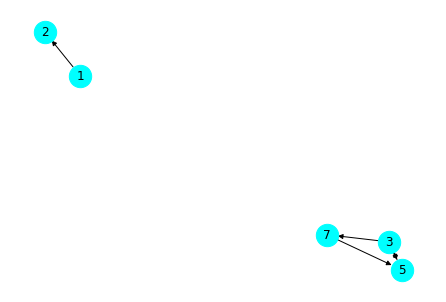

In [16]:
# k controls the distance between the nodes and varies between 0 and 1
# iterations is the number of times simulated annealing is run
# default k=0.1 and iterations=50
G = nx.DiGraph()
pos = nx.spring_layout(G, k=0.15, iterations=20, seed=3)
G.add_edges_from([(1, 2), (3, 5), (5, 3), (3, 7), (7, 5)])
draw_graph(G)

Component 1: Nodes: [1, 2] Edges: [(1, 2)]
Component 2: Nodes: [3, 5, 7] Edges: [(3, 5), (3, 7), (5, 3), (7, 5)]


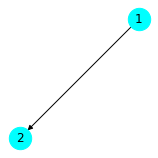

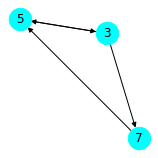

In [21]:
components = [G.subgraph(c).copy() for c in nx.weakly_connected_components(G)]
for idx, g in enumerate(components,start=1):
    print(f"Component {idx}: Nodes: {g.nodes()} Edges: {g.edges()}")
    draw_graph(g, k=0.1, figsize=(2,2))